# Find Roots of Quadratic Equation using Conditional Workflow

In [31]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [32]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    equation: str
    discriminant: float
    result : str

In [33]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {'equation': equation}

def calculate_discriminant(state: QuadState):
    discriminant = state['b']**2 - 4 * state['a'] * state['c']
    return {'discriminant': discriminant}

In [ ]:
def real_roots(state: QuadState):
  root1 = (-state['b'] + state['discriminant']**0.5) / (2 * state['a'])
  root2 = (-state['b'] - state['discriminant']**0.5) / (2 * state['a'])
  
  result = f"The roots are real and distinct: {root1} and {root2}"
  return {'result': result}



def repeated_roots(state: QuadState):
  root = -state['b'] / (2 * state['a'])
  
  result = f"The roots are real and repeated: {root}"
  return {'result': result}



def complex_roots(state: QuadState):
  result = "The roots are complex and distinct."
  return {'result': result}

In [35]:
def check_condition(state: QuadState) -> Literal['real_roots', 'repeated_roots', 'complex_roots']:
    if state['discriminant'] > 0:
        return 'real_roots'
    elif state['discriminant'] == 0:
        return 'repeated_roots'
    else:
        return 'complex_roots'

In [39]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)

graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('complex_roots', complex_roots)


graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots' , END)
graph.add_edge('complex_roots' , END)

workflow = graph.compile()

In [41]:
initial_state = {
    'a': 2,
    'b': 4,
    'c': 8
}
# Run the workflow
try:
    final_state = workflow.invoke(initial_state)
    print("=== Quadratic Equation Results ===")
    print(final_state['equation'])
    print(f"Discriminant: {final_state['discriminant']}")
    print(final_state['result'])
except Exception as e:
    print(f"Error running workflow: {e}")
    

=== Quadratic Equation Results ===
2x^2 + 4x + 8 = 0
Discriminant: -48
The roots are complex and distinct.


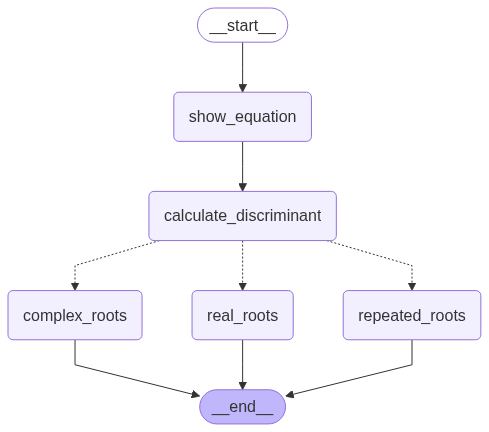

In [44]:
from IPython.display import Image
Image( workflow.get_graph().draw_mermaid_png())